<br><br>

<font color=#191347 ><font>
<p style = "font-family:times;">
    <font size="7">
        Interactive Learning 
    </font>    
</p>

<br>
    
<font color=#ed1c24><font>
<p style = "font-family:optima;">
    <font size="6">
        Homework #4
    </font>    
<font color=#000000> <font>
</p>

> $\textit{Mohammad Saadati - 810198410}$

# Table of Contents

- [Packages](#0)
- [Question 1](#1)
- [Question 2](#2)
- [Question 3](#3)
- [Question 4](#4)
- [Question 5](#5)

<a name='0'></a>
## Packages

Run the following cell to load the packages you'll need.

In [1]:
#%% import
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
#%% hyperparameters
REPS = 20
EPISODES = 2000
EPSILON = 0.1
LEARNING_RATE = 0.1
DISCOUNT = 0.9
STUDENT_NUM = 410

ACTIONS = [0,1,2,3,4,5]

In [3]:
#%%environment
env = gym.make('Taxi-v3')
env.seed(seed = STUDENT_NUM)
# env.reset(seed = STUDENT_NUM)
Initial_State = env.reset()
Initial_State

66

In [4]:
taxi_row, taxi_col, pass_idx, dest_idx = env.decode(189)
taxi_row, taxi_col, pass_idx, dest_idx

(1, 4, 2, 1)

In [5]:
#%% get familiar with the environment
print("you can see the environment in each step by render command :")
env.render()

you can see the environment in each step by render command :
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



<a name='1'></a>
# Question 1

In [38]:
class QLearning():
    def __init__(self, env, discount, epsilon_function, learning_rate_function):
        self.env = env
        self.discount = discount
        self.epsilon_function = epsilon_function
        self.learning_rate_function = learning_rate_function
        self.epsilon = self.epsilon_function(1)
        self.learning_rate = self.learning_rate_function(1)
        self.observation_space = self.env.observation_space.n
        self.action_space = self.env.action_space.n
        self.q_value = np.zeros((self.observation_space, self.action_space)) 

    def choose_action(self, state):
        p = np.random.rand()
        if p < self.epsilon:
            action = np.random.choice(self.action_space)
        else:
            action = self.choose_best_action(state)
        return action
    
    def choose_best_action(self, state):
        return np.argmax(self.q_value[state])
        
    def take_action(self, action):
        next_state, reward, done, _ = self.env.step(action)
        return next_state, reward, done

    def update_value(self, state, action, next_state, reward):
        self.q_value[state][action] = self.q_value[state][action] + self.learning_rate * \
                                (reward + self.discount * np.max(self.q_value[next_state]) - self.q_value[state][action])

    def decay_epsilon(self, episode):
        self.epsilon = self.epsilon_function(episode+1)

    def decay_learning_rate(self, episode):
        self.learning_rate = self.learning_rate_function(episode+1) 

In [45]:
def agent_QLearning_run(is_decay_epsilon, is_decay_learning_rate):
    cumulative_reward = np.zeros((REPS, EPISODES))
    optimal_cumulative_reward = -np.inf
    for rep in range(REPS):
        if is_decay_learning_rate:
            agent = QLearning(env, DISCOUNT, lambda x: 0.75*(1-1e-3)**x, lambda x : 1/np.sqrt(x))
        else:
            agent = QLearning(env, DISCOUNT, lambda x: 0.75*(1-1e-3)**x, lambda _: LEARNING_RATE)

        for episode in range(EPISODES):
            Initial_state = env.reset()
            state = Initial_state
            rewards = []

            while True:
                action = agent.choose_action(state)
                next_state, reward, done = agent.take_action(action)
                state = next_state
                agent.update_value(state, action, next_state, reward)
                rewards.append(reward)

                if done:
                    break

            cumulative_reward[rep][episode] = np.sum(rewards)
            if is_decay_epsilon:
                agent.decay_epsilon(episode+1)
            if is_decay_learning_rate:
                agent.decay_learning_rate(episode+1)
        
        optimal_cumulative_reward = max(optimal_cumulative_reward, run_optimal_policy(agent))
        
    return cumulative_reward, optimal_cumulative_reward
                
def run_optimal_policy(agent):
    Initial_state = env.reset()
    state = Initial_state
    rewards = []

    while True:
        action = agent.choose_best_action(state)
        next_state, reward, done = agent.take_action(action)
        state = next_state
        agent.update_value(state, action, next_state, reward)
        rewards.append(reward)

        if done:
            break
    
    return np.sum(rewards)

In [42]:
cumulative_reward_QLearning_no_decay_learning_rate, optimal_policy_1 = agent_QLearning_run(is_decay_epsilon=True, is_decay_learning_rate=False)

In [46]:
cumulative_reward_QLearning_decay_learning_rate, optimal_policy_2 = agent_QLearning_run(is_decay_epsilon=True, is_decay_learning_rate=True)

In [47]:
optimal_policy_1, optimal_policy_2

(-200, -200)

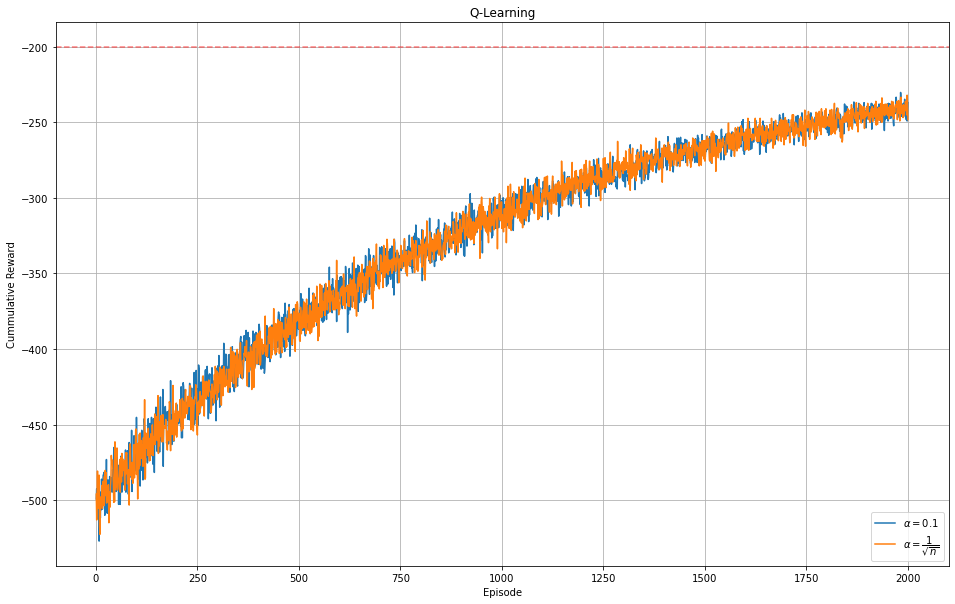

In [51]:
plt.figure(figsize=(16,10))
plt.plot(range(1,EPISODES+1),np.mean(cumulative_reward_QLearning_no_decay_learning_rate, axis=0), label='$α=0.1$')
plt.plot(range(1,EPISODES+1),np.mean(cumulative_reward_QLearning_decay_learning_rate, axis=0), label='$α=\dfrac{1}{\sqrt{n}}$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2), ls='--', c='r', alpha=0.5)
plt.title('Q-Learning')
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

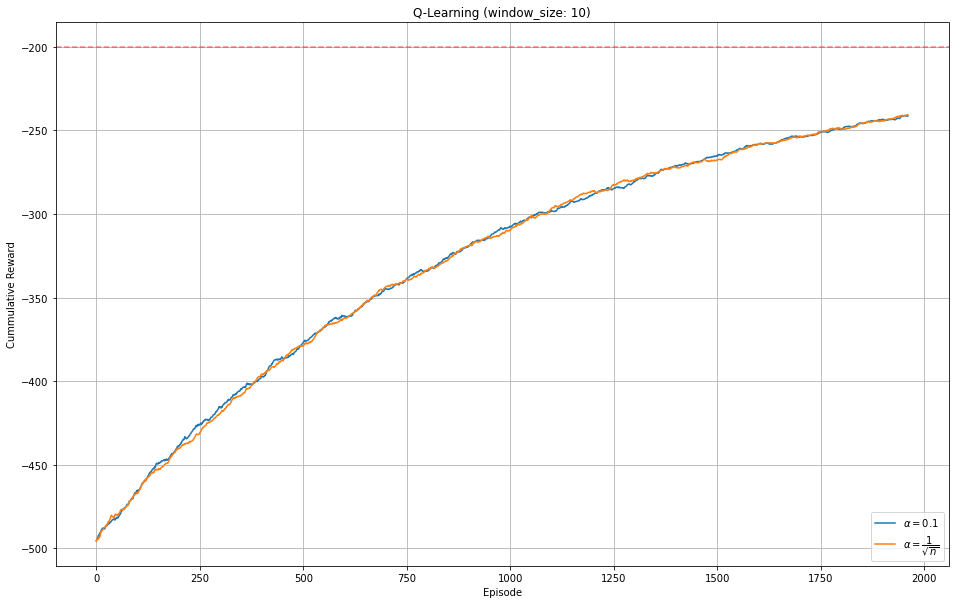

In [57]:
plt.figure(figsize=(16,10))

plt.title('Q-Learning (window_size: 40)')
plt.plot(np.convolve(np.mean(cumulative_reward_QLearning_no_decay_learning_rate, axis=0), np.ones(40)/40, mode='valid'), label='$α=0.1$')
plt.plot(np.convolve(np.mean(cumulative_reward_QLearning_decay_learning_rate, axis=0), np.ones(40)/40, mode='valid'), label='$α=\dfrac{1}{\sqrt{n}}$')
plt.axhline(y=max(optimal_policy_1, optimal_policy_2), ls='--', c='r', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Cummulative Reward')
plt.legend()
plt.grid()
plt.show()

<a name='2'></a>
# Question 2

<a name='3'></a>
# Question 3

<a name='4'></a>
# Question 4

<a name='5'></a>
# Question 5